In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

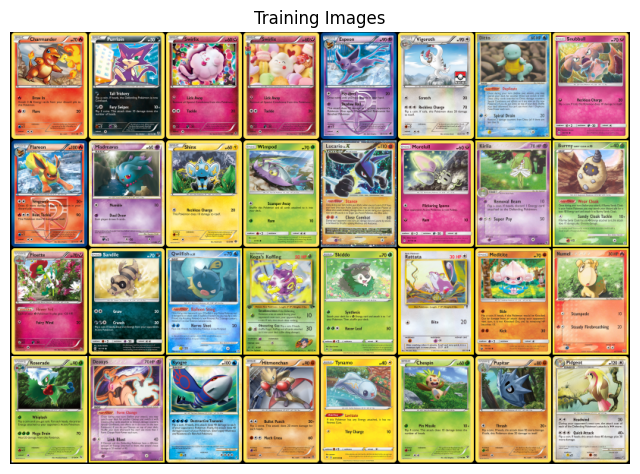

In [2]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = datasets.ImageFolder(root="resized4",
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32,
                                         shuffle=True, num_workers=1)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [8]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10

In [9]:
# Define the generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64 * 35 * 25),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (64, 35, 25)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 3, kernel_size=5, padding=2),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

In [10]:
# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=5, stride=2, padding=2),
        nn.LeakyReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(64, 64, kernel_size=7, stride=2, padding=3),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(128, momentum=0.8),
        nn.LeakyReLU(),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(128 * 13 * 18, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [11]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

Epoch [1/10]                        Batch 10/319 Discriminator Loss: 0.3580 Generator Loss: 2.0710
Epoch [1/10]                        Batch 20/319 Discriminator Loss: 0.3765 Generator Loss: 2.1163
Epoch [1/10]                        Batch 30/319 Discriminator Loss: 0.3883 Generator Loss: 2.2131
Epoch [1/10]                        Batch 40/319 Discriminator Loss: 0.3438 Generator Loss: 1.9785
Epoch [1/10]                        Batch 50/319 Discriminator Loss: 0.3581 Generator Loss: 2.1123
Epoch [1/10]                        Batch 60/319 Discriminator Loss: 0.3554 Generator Loss: 2.3430
Epoch [1/10]                        Batch 70/319 Discriminator Loss: 0.3988 Generator Loss: 1.9191
Epoch [1/10]                        Batch 80/319 Discriminator Loss: 0.3656 Generator Loss: 1.6384
Epoch [1/10]                        Batch 90/319 Discriminator Loss: 0.3832 Generator Loss: 2.4210
Epoch [1/10]                        Batch 100/319 Discriminator Loss: 0.3634 Generator Loss: 2.5356
Epoch [1/

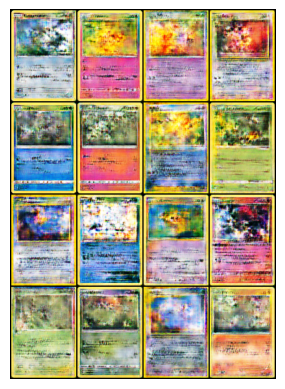

Epoch [2/10]                        Batch 10/319 Discriminator Loss: 0.3527 Generator Loss: 2.6197
Epoch [2/10]                        Batch 20/319 Discriminator Loss: 0.3833 Generator Loss: 2.8974
Epoch [2/10]                        Batch 30/319 Discriminator Loss: 0.3676 Generator Loss: 1.9581
Epoch [2/10]                        Batch 40/319 Discriminator Loss: 0.3972 Generator Loss: 1.5735
Epoch [2/10]                        Batch 50/319 Discriminator Loss: 0.3567 Generator Loss: 1.6413
Epoch [2/10]                        Batch 60/319 Discriminator Loss: 0.4526 Generator Loss: 2.6892
Epoch [2/10]                        Batch 70/319 Discriminator Loss: 0.3214 Generator Loss: 2.1667
Epoch [2/10]                        Batch 80/319 Discriminator Loss: 0.3446 Generator Loss: 2.2108
Epoch [2/10]                        Batch 90/319 Discriminator Loss: 0.3473 Generator Loss: 2.2356
Epoch [2/10]                        Batch 100/319 Discriminator Loss: 0.4480 Generator Loss: 1.1444
Epoch [2/

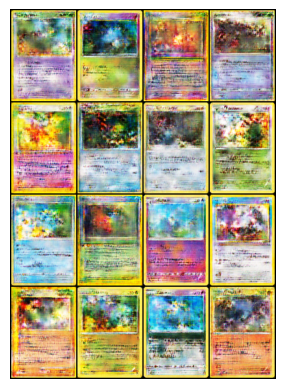

Epoch [3/10]                        Batch 10/319 Discriminator Loss: 0.3522 Generator Loss: 1.8286
Epoch [3/10]                        Batch 20/319 Discriminator Loss: 0.3283 Generator Loss: 2.1987
Epoch [3/10]                        Batch 30/319 Discriminator Loss: 0.3226 Generator Loss: 2.4105
Epoch [3/10]                        Batch 40/319 Discriminator Loss: 0.3310 Generator Loss: 2.1973
Epoch [3/10]                        Batch 50/319 Discriminator Loss: 0.3381 Generator Loss: 1.9251
Epoch [3/10]                        Batch 60/319 Discriminator Loss: 0.3792 Generator Loss: 2.1173
Epoch [3/10]                        Batch 70/319 Discriminator Loss: 0.3447 Generator Loss: 2.3189
Epoch [3/10]                        Batch 80/319 Discriminator Loss: 0.3236 Generator Loss: 2.8135
Epoch [3/10]                        Batch 90/319 Discriminator Loss: 0.3307 Generator Loss: 1.3916
Epoch [3/10]                        Batch 100/319 Discriminator Loss: 0.3593 Generator Loss: 1.7776
Epoch [3/

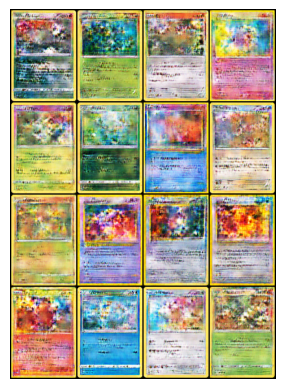

Epoch [4/10]                        Batch 10/319 Discriminator Loss: 0.3404 Generator Loss: 2.5679
Epoch [4/10]                        Batch 20/319 Discriminator Loss: 0.3241 Generator Loss: 2.2172
Epoch [4/10]                        Batch 30/319 Discriminator Loss: 0.3538 Generator Loss: 2.4559
Epoch [4/10]                        Batch 40/319 Discriminator Loss: 0.3544 Generator Loss: 2.3159
Epoch [4/10]                        Batch 50/319 Discriminator Loss: 0.4016 Generator Loss: 2.8726
Epoch [4/10]                        Batch 60/319 Discriminator Loss: 0.3997 Generator Loss: 1.5588
Epoch [4/10]                        Batch 70/319 Discriminator Loss: 0.3573 Generator Loss: 2.6167
Epoch [4/10]                        Batch 80/319 Discriminator Loss: 0.3265 Generator Loss: 2.2644
Epoch [4/10]                        Batch 90/319 Discriminator Loss: 0.3297 Generator Loss: 2.3314
Epoch [4/10]                        Batch 100/319 Discriminator Loss: 0.3469 Generator Loss: 2.3538
Epoch [4/

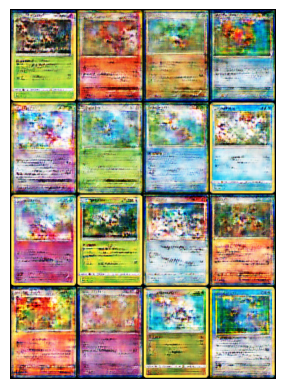

Epoch [5/10]                        Batch 10/319 Discriminator Loss: 0.3093 Generator Loss: 2.0021
Epoch [5/10]                        Batch 20/319 Discriminator Loss: 0.3157 Generator Loss: 1.9987
Epoch [5/10]                        Batch 30/319 Discriminator Loss: 0.3881 Generator Loss: 2.5541
Epoch [5/10]                        Batch 40/319 Discriminator Loss: 0.3396 Generator Loss: 2.4906
Epoch [5/10]                        Batch 50/319 Discriminator Loss: 0.3764 Generator Loss: 2.3112
Epoch [5/10]                        Batch 60/319 Discriminator Loss: 0.3690 Generator Loss: 1.2307
Epoch [5/10]                        Batch 70/319 Discriminator Loss: 0.3447 Generator Loss: 2.2118
Epoch [5/10]                        Batch 80/319 Discriminator Loss: 0.3861 Generator Loss: 1.5292
Epoch [5/10]                        Batch 90/319 Discriminator Loss: 0.3611 Generator Loss: 2.3499
Epoch [5/10]                        Batch 100/319 Discriminator Loss: 0.3424 Generator Loss: 2.4105
Epoch [5/

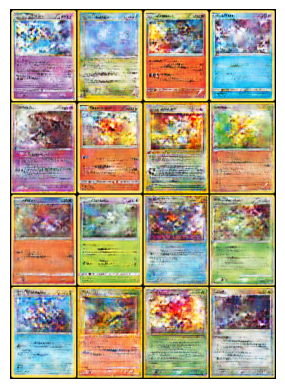

Epoch [6/10]                        Batch 10/319 Discriminator Loss: 0.3629 Generator Loss: 2.3690
Epoch [6/10]                        Batch 20/319 Discriminator Loss: 0.3512 Generator Loss: 1.7222
Epoch [6/10]                        Batch 30/319 Discriminator Loss: 0.3302 Generator Loss: 2.4973
Epoch [6/10]                        Batch 40/319 Discriminator Loss: 0.3739 Generator Loss: 2.1871
Epoch [6/10]                        Batch 50/319 Discriminator Loss: 0.3552 Generator Loss: 2.2833
Epoch [6/10]                        Batch 60/319 Discriminator Loss: 0.3698 Generator Loss: 1.8644
Epoch [6/10]                        Batch 70/319 Discriminator Loss: 0.3663 Generator Loss: 1.7818
Epoch [6/10]                        Batch 80/319 Discriminator Loss: 0.3472 Generator Loss: 2.8590
Epoch [6/10]                        Batch 90/319 Discriminator Loss: 0.3417 Generator Loss: 2.5769
Epoch [6/10]                        Batch 100/319 Discriminator Loss: 0.3760 Generator Loss: 2.4202
Epoch [6/

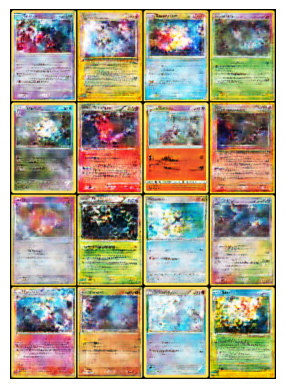

Epoch [7/10]                        Batch 10/319 Discriminator Loss: 0.3551 Generator Loss: 2.3913
Epoch [7/10]                        Batch 20/319 Discriminator Loss: 0.3808 Generator Loss: 1.2218
Epoch [7/10]                        Batch 30/319 Discriminator Loss: 0.3309 Generator Loss: 2.4103
Epoch [7/10]                        Batch 40/319 Discriminator Loss: 0.3474 Generator Loss: 2.7862
Epoch [7/10]                        Batch 50/319 Discriminator Loss: 0.3086 Generator Loss: 2.3200
Epoch [7/10]                        Batch 60/319 Discriminator Loss: 0.3559 Generator Loss: 2.7830
Epoch [7/10]                        Batch 70/319 Discriminator Loss: 0.3522 Generator Loss: 2.1968
Epoch [7/10]                        Batch 80/319 Discriminator Loss: 0.3743 Generator Loss: 1.8873
Epoch [7/10]                        Batch 90/319 Discriminator Loss: 0.3958 Generator Loss: 3.0760
Epoch [7/10]                        Batch 100/319 Discriminator Loss: 0.3620 Generator Loss: 2.2201
Epoch [7/

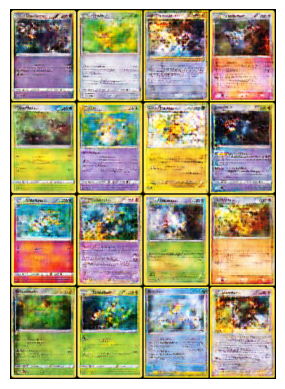

Epoch [8/10]                        Batch 10/319 Discriminator Loss: 0.3735 Generator Loss: 2.3164
Epoch [8/10]                        Batch 20/319 Discriminator Loss: 0.3351 Generator Loss: 2.2931
Epoch [8/10]                        Batch 30/319 Discriminator Loss: 0.3451 Generator Loss: 2.1902
Epoch [8/10]                        Batch 40/319 Discriminator Loss: 0.3662 Generator Loss: 2.5520
Epoch [8/10]                        Batch 50/319 Discriminator Loss: 0.3333 Generator Loss: 2.0055
Epoch [8/10]                        Batch 60/319 Discriminator Loss: 0.3427 Generator Loss: 1.8485
Epoch [8/10]                        Batch 70/319 Discriminator Loss: 0.3656 Generator Loss: 2.0241
Epoch [8/10]                        Batch 80/319 Discriminator Loss: 0.3182 Generator Loss: 2.0254
Epoch [8/10]                        Batch 90/319 Discriminator Loss: 0.3408 Generator Loss: 2.5469
Epoch [8/10]                        Batch 100/319 Discriminator Loss: 0.3193 Generator Loss: 2.4873
Epoch [8/

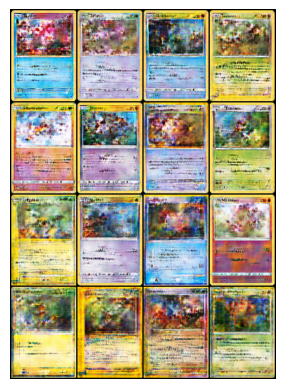

Epoch [9/10]                        Batch 10/319 Discriminator Loss: 0.3570 Generator Loss: 2.0671
Epoch [9/10]                        Batch 20/319 Discriminator Loss: 0.3569 Generator Loss: 2.5756
Epoch [9/10]                        Batch 30/319 Discriminator Loss: 0.3615 Generator Loss: 3.3255
Epoch [9/10]                        Batch 40/319 Discriminator Loss: 0.3477 Generator Loss: 2.1014
Epoch [9/10]                        Batch 50/319 Discriminator Loss: 0.3288 Generator Loss: 2.2790
Epoch [9/10]                        Batch 60/319 Discriminator Loss: 0.3859 Generator Loss: 2.1292
Epoch [9/10]                        Batch 70/319 Discriminator Loss: 0.3386 Generator Loss: 2.3521
Epoch [9/10]                        Batch 80/319 Discriminator Loss: 0.3051 Generator Loss: 2.9268
Epoch [9/10]                        Batch 90/319 Discriminator Loss: 0.3600 Generator Loss: 1.6248
Epoch [9/10]                        Batch 100/319 Discriminator Loss: 0.3026 Generator Loss: 2.0016
Epoch [9/

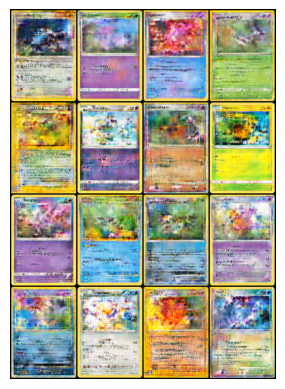

Epoch [10/10]                        Batch 10/319 Discriminator Loss: 0.3303 Generator Loss: 2.3051
Epoch [10/10]                        Batch 20/319 Discriminator Loss: 0.3559 Generator Loss: 2.1245
Epoch [10/10]                        Batch 30/319 Discriminator Loss: 0.3888 Generator Loss: 2.4547
Epoch [10/10]                        Batch 40/319 Discriminator Loss: 0.3276 Generator Loss: 2.1285
Epoch [10/10]                        Batch 50/319 Discriminator Loss: 0.4440 Generator Loss: 2.4584
Epoch [10/10]                        Batch 60/319 Discriminator Loss: 0.3501 Generator Loss: 2.1976
Epoch [10/10]                        Batch 70/319 Discriminator Loss: 0.3602 Generator Loss: 2.2462
Epoch [10/10]                        Batch 80/319 Discriminator Loss: 0.3273 Generator Loss: 1.8948
Epoch [10/10]                        Batch 90/319 Discriminator Loss: 0.3374 Generator Loss: 2.1338
Epoch [10/10]                        Batch 100/319 Discriminator Loss: 0.3287 Generator Loss: 2.4635

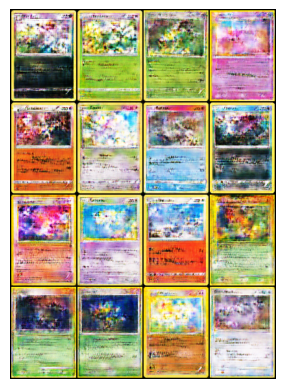

In [15]:
# Training loop
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
       # Convert list to tensor
        real_images = batch[0].to(device) 
        # Adversarial ground truths
        valid = torch.zeros(real_images.size(0), 1, device=device) + torch.rand(real_images.size(0), 1, device=device)*0.2
        fake = torch.ones(real_images.size(0), 1, device=device) - torch.rand(real_images.size(0), 1, device=device)*0.2
        # Configure input
        real_images = real_images.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Sample noise as generator input
        z = torch.randn(real_images.size(0), latent_dim, device=device)
        # Generate a batch of images
        fake_images = generator(z)

        # Measure discriminator's ability 
        # to classify real and fake images
        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()
        # Generate a batch of images
        gen_images = generator(z)
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        # ---------------------
        #  Progress Monitoring
        # ---------------------
        if (i + 1) % 10 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    # Save generated images for every epoch
    if (epoch + 1) % 1 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()